# <center>K-Means</center>

### K-Means : 
- salah satu algoritma klastering yang paling umum digunakan dalam analisis data dan pembelajaran mesin.
- K-Means dapat dipengaruhi oleh skala data. Oleh karena itu, normalisasi atau penskalaan data seringkali diperlukan sebelum menerapkan algoritma ini.

### Tujuan :
- Pembagian Klaster (Clustering): K-Means bertujuan untuk membagi data menjadi kelompok-kelompok homogen yang disebut klaster.
- Minimalkan Jarak: K-Means mencoba meminimalkan jumlah kuadrat jarak antara titik data dalam klaster dengan pusat klaster yang sesuai.

### Kelebihan dan Keterbatasan:
    
- Kelebihan: Sederhana, efisien untuk sejumlah besar data, dan dapat digunakan dalam berbagai aplikasi.
- Keterbatasan: Memerlukan jumlah klaster yang diinginkan (K) sebelumnya, sensitif terhadap inisialisasi awal, dan dapat terjebak dalam optimum lokal.

### Langkah-langkah Algoritma K-Means:
- Inisialisasi Pusat Klaster: Pilih secara acak K pusat klaster awal.
- Alokasi Data: Alokasikan setiap titik data ke klaster yang memiliki pusat terdekat.
- Perbarui Pusat Klaster: Hitung ulang pusat klaster sebagai rata-rata dari semua titik data dalam klaster.
- Ulangi: Ulangi langkah-langkah di atas hingga tidak ada perubahan dalam alokasi klaster.

# <center>Mall Customer Segmentation</center>

### Tujuan :
- Untuk mengklasifikasikan / mengelompokkan Pelanggan Mall berdasarkan fitur numerik dan kategorikal.
- Ini adalah **Unsupervised Learning** problem statement.

### <center>Dataset Attributes</center>
    
- **CustomerID** : Unique ID assigned to the customer
- **Gender** : Gender of the customer
- **Age** : Age of the customer
- **Annual Income (pendapatan tahunan) (k\\$)** :Pendapatan tahunan pelanggan
- **Spending Score (Skor pengeluaran)(1-1000)** : Skor yang diberikan oleh mal berdasarkan perilaku pelanggan dan sifat pembelanjaan

# <center>Dataset Information</center>

### Import Data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Info :

In [3]:
data.shape

(200, 5)

In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


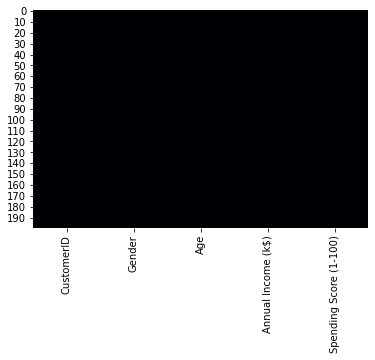

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- heatmap menunjukkan tdak ada warna sehingga dapat disimpulakn bahwa **tidak ada nilai null** dalam data set

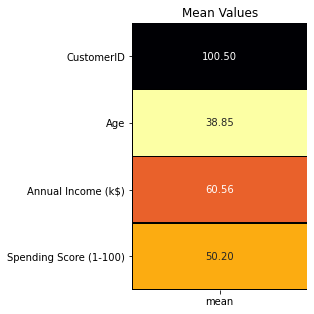

In [7]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'inferno_r',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 3)

Interpretasinya:
1. Rata-rata usia pelanggan:
Rata-rata usia pelanggan dalam dataset ini berada di akhir 30-an,    yaitu sekitar 38.85 tahun
2. Rata-rata Pendapatan Tahunan (dalam ribuan Dolar):
Rata-rata pendapatan tahunan pelanggan adalah 60.56 ribu Dolar. Ini berarti rata-rata pendapatan pelanggan di pusat perbelanjaan ini cukup tinggi.
3. Rata-rata Skor Pengeluaran (1-100):
Rata-rata skor pengeluaran pelanggan di pusat perbelanjaan ini adalah 50.20. Skor ini berada di tengah-tengah rentang 1 hingga 100, menunjukkan bahwa pelanggan secara keseluruhan memiliki kecenderungan pengeluaran yang seimbang.

# <center>Exploratory Data Analysis</center>

### Dividing (membagi) features into Numerical and Categorical :

In [8]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6: #memerksa jumlah nilai unik dalam setiap klom
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : CustomerID Age Annual Income (k$) Spending Score (1-100)


Interpretasi:
- Angka 6 di sini adalah nilai ambang yang telah ditentukan
- fitur kategorikal dan numerikal dibedakan berdasarkan jumlah nilai unik dalam setiap atribut. Jika sebuah atribut memiliki kurang dari 6 nilai unik, maka dianggap sebagai fitur kategorikal; sebaliknya, jika atribut memiliki 6 nilai unik atau lebih, dianggap sebagai fitur numerikal.
- Fitur Kategorikal (Categorical Features): Hanya ada satu fitur kategorikal, yaitu "Gender" (jenis kelamin). 
- Fitur Numerikal (Numerical Features): Terdapat tiga fitur numerikal, yaitu "CustomerID", "Age" (usia), "Annual Income (k$)" (pendapatan tahunan), dan "Spending Score (1-100)" (skor pengeluaran). 


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Gender'] = le.fit_transform(df1['Gender'])

print('Label Encoder Transformation')
print(df1['Gender'].unique(),' = ',le.inverse_transform(df1['Gender'].unique()))

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']


- menggunakan LabelEncoder dari scikit-learn untuk mengubah nilai-nilai teks dalam kolom 'Gender' menjadi nilai numerik. Dalam hal ini, 'Male' diubah menjadi 1 dan 'Female' diubah menjadi 0.
- Saya membuat salinan mendalam dari dataset asli dengan menggunakan 'data.copy(deep=True)'. Salinan mendalam berarti membuat duplikat yang benar-benar terpisah dari dataset asli sehingga perubahan pada salinan tidak mempengaruhi dataset asli.
- Dataset yang telah diubah dengan label encoding dapat digunakan untuk visualisasi data atau sebagai input untuk model-machine learning tanpa mengubah nilai-nilai dalam dataset asli.

### Distribution of Categorical and Numerical Features :

C:\Users\angel tarigan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\angel tarigan\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\angel tarigan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warning

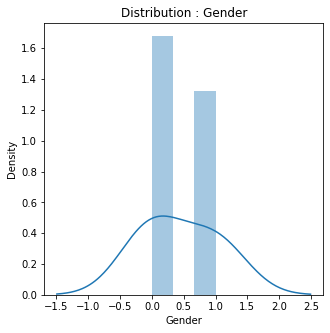

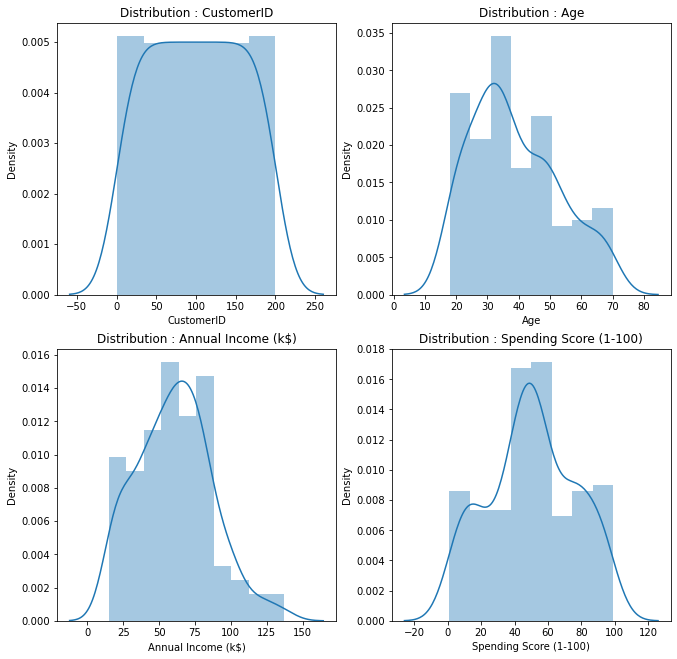

In [10]:
# membuat beberapa subplot untuk memvisualisasikan distribusi dari fitur kategorikal dan numerikal menggunakan seaborn (sns)
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
for i in range(len(categorical_features)):
    plt.subplot(1,1,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

saya melakukan iterasi melalui fitur numerikal dan menggunakan 'sns.distplot' untuk memplot distribusi setiap fitur.

hasil interpretasi':
1. Gender, Fitur Kategorikal:
Distribusi data untuk fitur kategorikal 'Gender' menunjukkan bahwa data terdistribusi secara normal. Ini berarti proporsi antara kategori 'Male' dan 'Female' relatif seimbang.

2. Age dan Annual Income ,Fitur Numerikal:
Distribusi usia ('Age') dan pendapatan tahunan ('Annual Income (k$)') cenderung bersifat positif atau condong ke kanan (positively skewed). Ini bisa mengindikasikan bahwa sebagian besar pelanggan cenderung lebih muda dan memiliki pendapatan yang lebih rendah, namun ada sejumlah pelanggan dengan usia dan pendapatan yang lebih tinggi.

3. Spending Score (1-100), Fitur Numerikal:
Distribusi skor pengeluaran ('Spending Score (1-100)') menunjukkan pola yang mirip dengan pola "Head and Shoulder" yang sering terlihat dalam grafik saham. Artinya, skor pengeluaran cenderung meningkat ke puncak tertinggi, kemudian mengalami penurunan dan membentuk dua "bahu" di sekitar nilai 20 dan 80, dengan "kepala" terletak di antara 40-60. Pola ini dapat memberikan wawasan tentang perilaku pengeluaran pelanggan yang mungkin memiliki dua kelompok utama, yaitu pelanggan yang lebih hemat (bahu kiri) dan pelanggan yang lebih boros (bahu kanan).

4. Penghapusan Fitur CustomerID:
Keputusan untuk menghapus fitur 'CustomerID' dilakukan karena fitur ini hanya merupakan identifikasi unik untuk setiap pelanggan dan tidak memberikan informasi yang berarti dalam analisis. Fitur semacam ini tidak memberikan wawasan yang berguna dan dapat diabaikan untuk keperluan pemodelan atau analisis.

In [11]:
numerical_features.remove('CustomerID')

### Categorical Features :

C:\Users\angel tarigan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


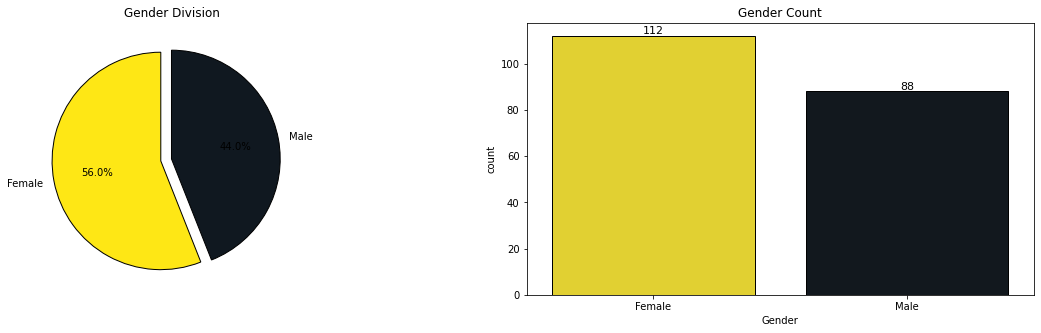

In [12]:
# visualisasi untuk menganalisis pembagian jenis kelamin
l = list(data['Gender'].value_counts())
circle = [l[0] / len(l) * 100, l[1] / len(l) * 100]
colors = ['#FEE715','#101820']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
plt.pie(circle,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender Division');

plt.subplot(1,2,2)
ax = sns.countplot('Gender',data = df1,palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Gender Count')
ax.set_xticklabels(['Female','Male'])

plt.show()

Berdasarkan kedua visualisasi, pelanggan perempuan (female) lebih bnayak dibandingkan pelanggan laki-laki (male).

### Numerical Features vs Categorical Features :

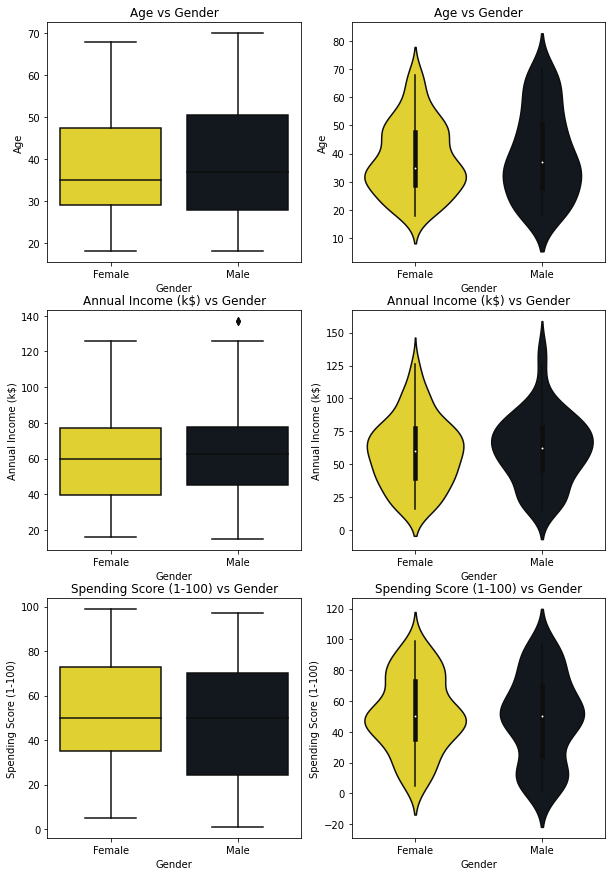

In [13]:
# visualisasi 2 jenis plot untuk membandingkan distrbus fitur dengan gender
fig = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features)):# Melakukan iterasi melalui setiap fitur numerikal.
    plt.subplot(3,2, (i * 2)  + 1)
    ax = sns.boxplot(x = 'Gender',y = numerical_features[i],palette = colors,data = df1) # Membuat boxplot untuk memvisualisasikan sebaran data dan pencarian nilai-nilai ekstrem.
    ax.set_xticklabels(['Female','Male']) # Menetapkan label pada sumbu x
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)
    
    plt.subplot(3,2,(i * 2) + 2) # Membuat subplot untuk violinplot di baris yang sesuai.
    ax = sns.violinplot(x = 'Gender',y = numerical_features[i],palette = colors,data = df1) # Membuat violinplot untuk memvisualisasikan distribusi data dan kepadatan.
    ax.set_xticklabels(['Female','Male']) #Menetapkan label pada sumbu x
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)

Rentang usia pelanggan perempuan berkisar dari 30 hingga sedikit di bawah 50, sementara rentang usia pelanggan laki-laki berkisar dari sedikit di bawah 30 hingga 50. Untuk kedua jenis kelamin, terlihat ada penumpukan pada rentang usia 30-35 tahun. Median usia laki-laki sedikit lebih tinggi dibandingkan dengan perempuan. 

Untuk pendapatan tahunan, pendapatan perempuan dimulai dari 40k, sedangkan pendapatan laki-laki dimulai dari nilai di atas ini. Median pendapatan tahunan (k) untuk kedua jenis kelamin berada di sekitar 60k. Pendapatan tahunan (k$) pelanggan laki-laki meruncing sangat tajam di puncaknya dengan beberapa nilai yang berbeda, dibandingkan dengan pelanggan perempuan.

Median Skor Pengeluaran (1-100) untuk kedua jenis kelamin sama meskipun memiliki titik awal yang berbeda, yaitu sedikit di bawah 40 dan sedikit di atas 20 untuk pelanggan perempuan dan laki-laki, masing-masing.

Kedua jenis kelamin menunjukkan penumpukan yang kuat pada nilai median, terutama pelanggan perempuan. Namun, pelanggan laki-laki menunjukkan penumpukan kecil tetapi signifikan dalam rentang 0-20 juga.

### Numerical Features vs Categorical Feature :

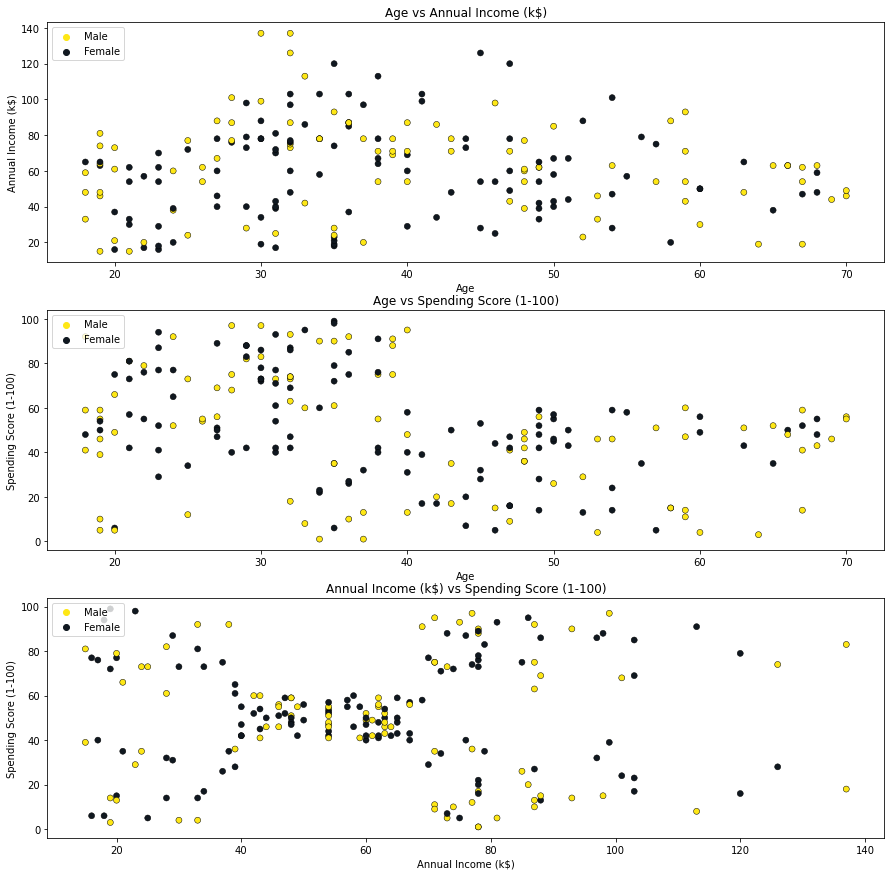

In [19]:
# visualisasi scatter plt untuk membandingkan hubungan antar pasangan fitur numerik
a = 0 # Variabel ini digunakan untuk melacak urutan subplot
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features) - 1): # Loop pertama untuk fitur pertama dalam pasangan
    for j in range(len(numerical_features)): # Loop kedua untuk fitur kedua dalam pasangan
        if i != j and j > i: # mencegah duplikasi
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,
                            hue = 'Gender',palette = colors,edgecolor = 'black'); 
            plt.legend(loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- Titik data Pendapatan Tahunan terdapat di seluruh nilai Usia, Gender tidak memberikan informasi signifikan apa pun.
- Untuk Skor Pengeluaran (1-100), terlihat jelas bahwa rentang Usia 20 – 30 menunjukkan kebiasaan belanja yang sangat tinggi.
- Kelompok usia 30 - 40 tahun menyoroti kebiasaan belanja ekstrem pelanggan. 40 - 70 Pelanggan kelompok usia menunjukkan sisi lain dari kebiasaan belanja dengan nilai rendah.
- Dari Pendapatan Tahunan vs Skor Pengeluaran (1-100), terdapat 5 kelompok berbeda yang dapat diamati. Untuk nilai Pendapatan Tahunan antara 0 - 40, data menyoroti 2 kelompok pelanggan dengan Skor Pengeluaran (1-100) antara 0 - 40 dan 60 - 100.
- Setelah menampilkan 1 ekstrem ini, data menyoroti kelompok pelanggan menengah yang memiliki Pendapatan Tahunan antara 40 - 70k dan Skor Pengeluaran (1-100) antara 40 - 60.
- Nilai Pendapatan Tahunan antara 70 - 140k menentukan ekstrim lainnya yang dibagi menjadi 2 kelompok berdasarkan Skor Pengeluaran (1-100) nilai 0 - 40 dan 60 - 100.

# <center>Summary of EDA</center>

- Untuk data mall diatas, pelanggan **wanita** lebih banyak dibandingkan pelanggan pria. Data gender didistribusikan secara merata tanpa fitur-fitur lainnya.
Pelanggan Mall dapat dibagi berdasarkan kelompok umurnya :
-20 - 30
-30 - 40
-40 - 70.
- Pendapatan Tahunan Median untuk kedua jenis kelamin adalah sekitar **60k**. Ini menampilkan 3 kelompok nilai:
-0 - 40k
-40 - 70k
-70 - 140k.
-Skor Pengeluaran (1-100) pelanggan **perempuan** lebih tinggi dibandingkan pelanggan laki-laki. Itu juga dapat membagi pelanggan menjadi 3 kelompok:
-0 - 40
-40 - 60
-60 - 100
Dengan menggunakan kombinasi nilai-nilai di atas, Pelanggan Mall dapat disegmentasi dan menghasilkan katering khusus untuk mereka.

# <center>Feature Engineering</center>

### Correlation Matrix :

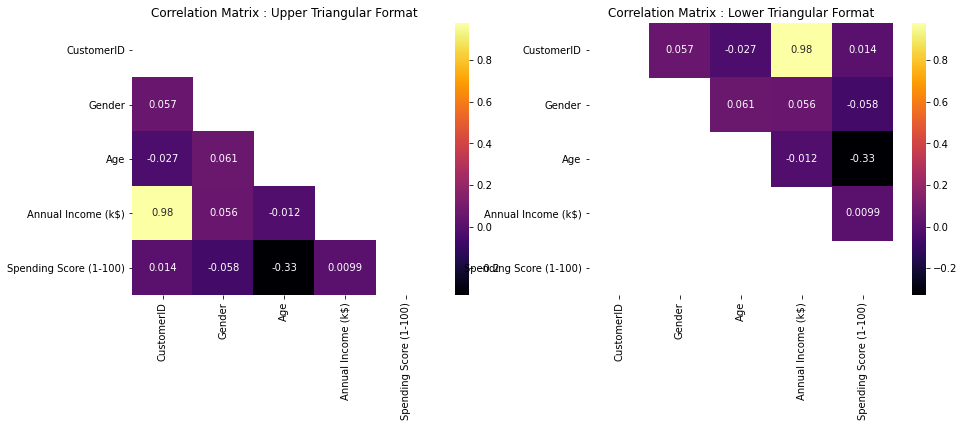

In [15]:
#membuat dua matriks korelasi berdasarkan DataFrame (df1) dan kemudian menampilkan keduanya dalam format segitiga atas dan bawah
ut = np.triu(df1.corr()) # Menghitung matriks korelasi untuk semua pasangan fitur numerik dalam DataFrame
lt = np.tril(df1.corr()) # Membuat matriks segitiga atas dan bawah dari matriks korelasi.

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5)) # Membuat subplot dengan dua kolom (heatmap segitiga atas dan bawah).
plt.subplot(1,2,1)
sns.heatmap(df1.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df1.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

df1.drop(columns = 'CustomerID',inplace = True) # menghapus klom CostumerID dari df1

- Kedua matriks yang ditampilkan sama, Itu hanya dilakukan untuk tujuan visualisasi. ini dapat digunakan ketika kumpulan data memiliki terlalu banyak fitur untuk diperhatikan
- CustomerID menampilkan korelasi positif yang sangat tinggi dengan Pendapatan Tahunan karena pelanggan disusun dalam urutan menaik menurut Pendapatan Tahunan mereka. saya tidak menyertakan CustomerID untuk tujuan pemodelan.
- Gender tidak menunjukkan hubungan apa pun dengan fitur lainnya. Ini cukup netral dengan semua nilai menempel pada 0.
- Skor Pengeluaran (1-100) dan Usia menunjukkan korelasi negatif yaitu jika nilai suatu fitur meningkat, maka nilai fitur lainnya menurun dan berlaku sebaliknya

### Data Scaling :

- terdapat 2 oopsi untuk penskalaan data : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- Karena sebagian besar algoritma mengasumsikan data berdistribusi normal (Gaussian), Normalisasi dilakukan untuk fitur yang tidak menampilkan distribusi normal dan standarisasi dilakukan untuk fitur yang berdistribusi normal tetapi rentang nilainya besar atau kecil dibandingkan ke fitur lainnya.

In [16]:
# menggunakan 2 metoode preprocessing utama 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Label Encoding 
df2 = df1.copy(deep = True) # Ini dilakukan untuk memastikan bahwa perubahan pada df2 tidak mempengaruhi df1.

# Normalization
df2['Age'] = mms.fit_transform(df2[['Age']])
df2['Annual Income (k$)'] = mms.fit_transform(df2[['Annual Income (k$)']])
df2['Spending Score (1-100)'] = mms.fit_transform(df2[['Spending Score (1-100)']])
# Proses normalisasi berguna saat kita ingin memastikan bahwa semua fitur memiliki skala yang serupa
# setiap fitur akan diubah sehingga memiliki mean 0 dan deviasi standar 1.

Dalam rangka menunjukkan perbedaan performa antara model yang dilatih pada dataset asli dan dataset yang dinormalisasi, membuat salinan dari dataset asli dan kemudian menerapkan transformasi normalisasi padanya. Langkah ini dilakukan agar dapat membandingkan bagaimana performa model dapat bervariasi tergantung pada apakah data dinormalisasi atau tidak.

# <center>Modeling</center>

ketika ukuran dataset menjadi besar dengan terlalu banyak fitur, visualisasi data dapat menjadi tugas yang melelahkan untuk dijalankan. Oleh karena itu, beralih ke algoritma K-Means Clustering yang tidak mendukung fitur kategorikal. Ini adalah algoritma yang sangat disukai untuk menangani Pembelajaran Tanpa Pengawasan yang melakukan tugas menemukan kluster atau grup dalam data namun dengan pendekatan matematis:

1. Pilih 2 (asumsikan k = 2) centroid secara acak.
2. Hitung jarak antara centroid dan semua titik data.
3. Jika titik data lebih dekat ke salah satu centroid, maka titik tersebut diberi label sebagai centroid tersebut, dan sebaliknya.
4. Untuk 2 kluster yang terbentuk, nilai rata-rata dari titik data yang dikelompokkan dengan salah satu centroid dihitung, dan nilai rata-rata ini kemudian ditentukan sebagai kluster baru.
5. Proses ini diulangi sampai kedua centroid konvergen ke titik tetap.

Parameter k (hyperparameter): Ini menentukan jumlah kluster atau grup yang data harus dibagi. Untuk pemilihan nilai k, kita menggunakan 2 tes statistik:

1. Metode Siku (Elbow Method): Ini adalah metode yang menggambar jumlah kesalahan kuadrat untuk rentang nilai k. Jika plot ini terlihat seperti siku, maka nilai k yang menyerupai siku tersebut dipilih. Dari nilai siku ini, jumlah nilai kuadrat (inerstia) mulai menurun secara linear dan oleh karena itu dianggap sebagai nilai optimal.

2. Metode Skor Silhouette (Silhouette Score Method): Ini adalah metode yang mengevaluasi kualitas kluster dalam hal seberapa baik titik data dikelompokkan dengan titik data lain yang mirip. Skor ini dihitung menggunakan rumus jarak, dan nilai k dengan skor tertinggi dipilih untuk pemodelan.


In [17]:
# penghapusan fitur kategorikal 'Gender' dari dua dataset, df1 dan df2
df1.drop(columns = 'Gender',inplace = True)
df2.drop(columns = 'Gender',inplace = True)

Penghapusan fitur 'Gender' ini dapat meningkatkan performa model atau mengurangi dimensi data yang tidak relevan.

### <center>Age - Annual Income (k\$)</center>

In [20]:
# membuat dua array numpy yang merupakan representasi numerik dari data set
m1 = df1[['Age','Annual Income (k$)']].values # Original Dataset
m2 = df2[['Age','Annual Income (k$)']].values # Normalized Dataset

menghasilkan dua set data numerik yang dapat digunakan untuk melatih model, dan khususnya, m2 mewakili dataset yang telah dinormalisasi. Normalisasi dapat meningkatkan performa beberapa jenis model machine learning, terutama yang sensitif terhadap skala variabel. 

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

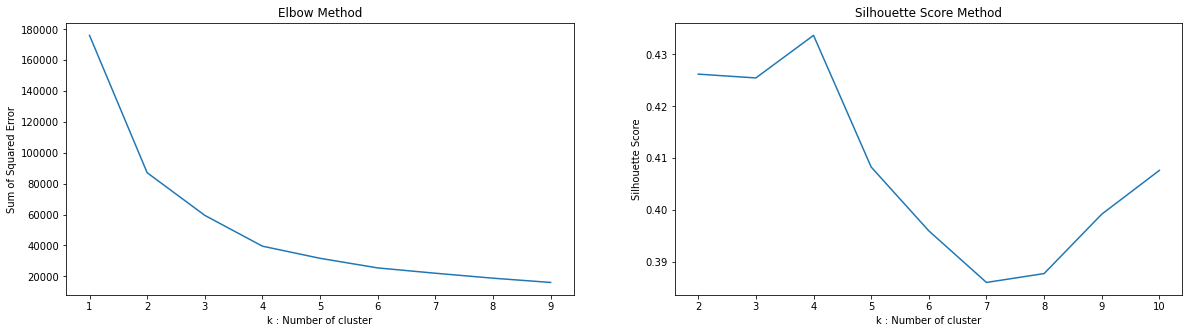

In [19]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method : untuk Menentukan jumlah kluster yang optimal berdasarkan perubahan Inertia (Sum of Squared Error).
plt.subplot(1,2,1)
for k in range(1, 10): # melakukan iterasi dar 1-9 kulster
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1) # Untuk setiap nilai k, model K-Means dilatih pada dataset original (m1).
    sse[k] = kmeans.inertia_ # Inertia: Jumlah jarak sampel ke pusat cluster terdekat
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method: mengukur seberapa baik objek dalam suatu kluster cocok dengan kluster lainnya
plt.subplot(1,2,2)
for k in range(2, kmax + 1): #Melakukan iterasi dari 2 hingga 10 kluster.
    kmeans = KMeans(n_clusters = k).fit(m1) #Untuk setiap nilai k, model K-Means dilatih pada dataset original (m1).
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Hasil Elbow Method:Plot garis akan menunjukkan siku (elbow) di titik di mana penurunan SSE mulai melambat. Nilai k pada siku dianggap sebagai jumlah kluster optimal.
- Hasil Silhouette :Plot garis akan menunjukkan puncak skor Silhouette. Nilai k pada puncak dianggap sebagai jumlah kluster optimal.
- Berdasarkan dari ke 2 hasil method, saya pilih:
    - **k : Clusters = 4**

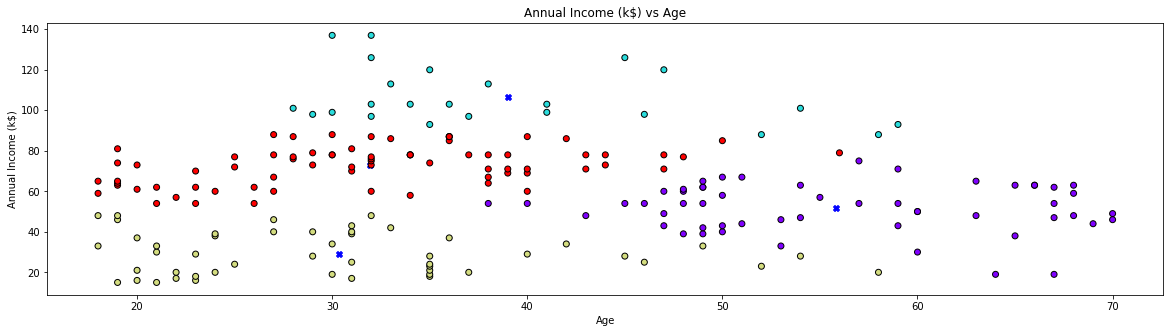

In [20]:
model = KMeans(n_clusters = 4,max_iter = 1000) # dng 4 kluster dan max iterasi sebnyk 1000
model.fit(m1)
cluster = model.cluster_centers_ #mendapat kooordinat pusat dar masng2 kluster
centroids = np.array(cluster) #Mengonversi koordinat pusat ke dalam array NumPy
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Annual Income (k$)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show();

Hasil visualisasi ini memperlihatkan bagaimana model K-Means telah mengelompokkan data ke dalam empat kluster berdasarkan distribusi umur dan pendapatan tahunan. Titik-titik yang memiliki warna yang sama pada plot menunjukkan bahwa mereka termasuk dalam kluster yang sama. Marker "X" menunjukkan koordinat pusat dari masing-masing kluster. Plot ini membantu dalam memahami pola dan relasi antara dua fitur ('Age' dan 'Annual Income (k$)') setelah dilakukan pengelompokan menggunakan algoritma K-Means.

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

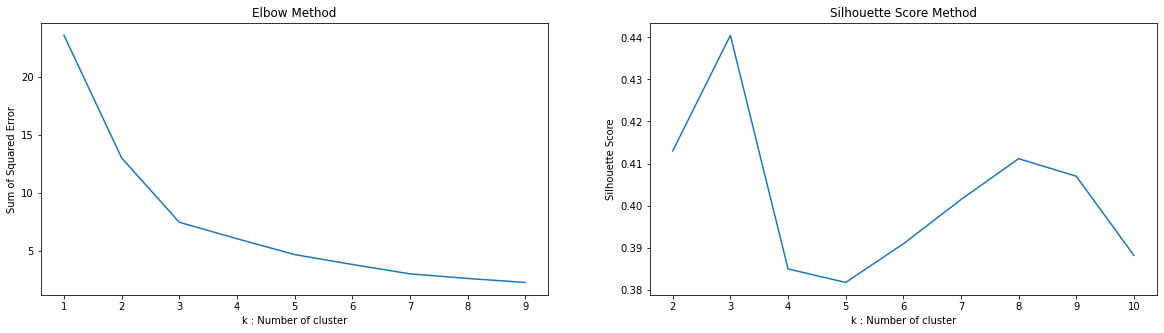

In [21]:
# menggunakan dataset yang sudah dinormalisasi 'm2'
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :Menentukan jumlah kluster yang optimal berdasarkan perubahan Inertia (Sum of Squared Error).
plt.subplot(1,2,1)
for k in range(1, 10): # Melakukan iterasi dari 1 hingga 9 kluster.
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2) # Untuk setiap nilai k, model K-Means dilatih pada dataset yang sudah dinormalisasi (m2).
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method :mengukur seberapa baik objek dalam suatu kluster cocok dengan kluster lainnya
plt.subplot(1,2,2)
for k in range(2, kmax + 1): #Melakukan iterasi dari 2 hingga 10 kluster
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Hasil Elbow Method : Plot garis akan menunjukkan siku (elbow) di titik di mana penurunan SSE mulai melambat. Nilai k pada siku dianggap sebagai jumlah kluster optimal.
- Plot garis akan menunjukkan puncak skor Silhouette. Nilai k pada puncak dianggap sebagai jumlah kluster optimal.
Dari hasil kedua method, diambil :
    - **k : Clusters = 3**

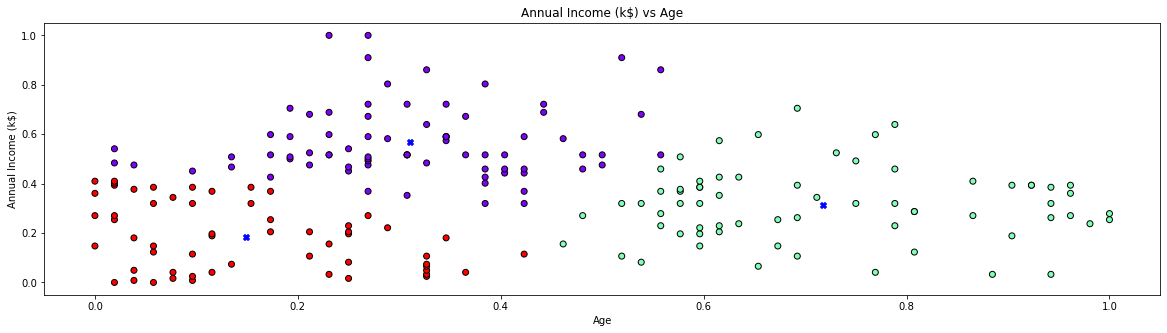

In [22]:
model = KMeans(n_clusters = 3,max_iter = 1000) #Membuat objek model K-Means dengan 3 kluster dan maksimum iterasi sebanyak 1000.
model.fit(m2) #Melatih model menggunakan dataset yang sudah dinormalisasi (m2).
cluster = model.cluster_centers_ #Mendapatkan koordinat pusat dari masing-masing kluster.
centroids = np.array(cluster) #Mengonversi koordinat pusat ke dalam array NumPy.
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Annual Income (k$)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show();

Hasil visualisasi ini memperlihatkan bagaimana model K-Means telah mengelompokkan data ke dalam tiga kluster berdasarkan distribusi umur dan pendapatan tahunan yang sudah dinormalisasi. Titik-titik yang memiliki warna yang sama pada plot menunjukkan bahwa mereka termasuk dalam kluster yang sama. Marker "X" menunjukkan koordinat pusat dari masing-masing kluster. Plot ini membantu dalam memahami pola dan relasi antara dua fitur ('Age' dan 'Annual Income (k$)') setelah dilakukan pengelompokan menggunakan algoritma K-Means pada dataset yang sudah dinormalisasi.

### <center>Age - Spending Score (1-100)</center>

In [23]:
m1 = df1[['Age','Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Age','Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

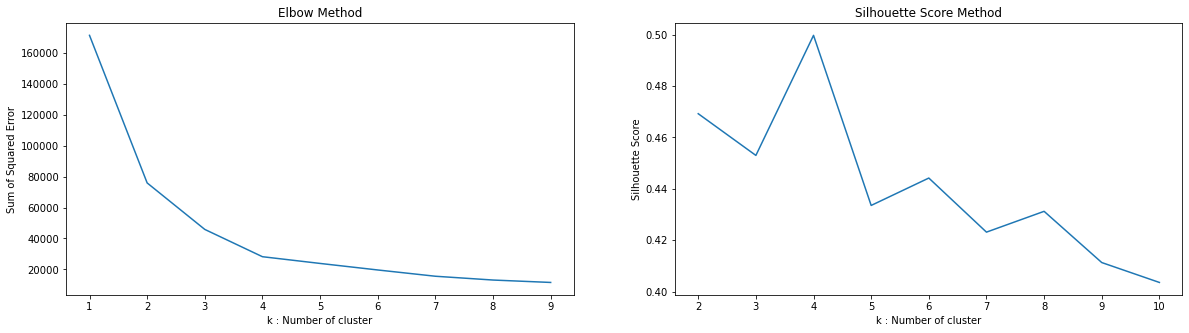

In [24]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10): # Melakukan iterasi untuk nilai k dari 1 hingga 9.
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1) # Melatih model K-Means dengan jumlah kluster sebanyak k.
    sse[k] = kmeans.inertia_ # Inertia: Jumlah jarak sampel ke pusat cluster terdekat
sns.lineplot(x = list(sse.keys()), y = list(sse.values())); #Menggambar kurva Elbow Method dengan sumbu x berisi nilai k dan sumbu y berisi nilai SSE.
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):#  Melakukan iterasi untuk nilai k dari 2 hingga nilai maksimum k (kmax).
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean')) #Menyimpan nilai Silhouette Score ke dalam list untuk nilai k tertentu.
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Hasil visualisasi ini membantu menentukan jumlah optimal dari kluster (k) berdasarkan Elbow Method dan Silhouette Score Method untuk dataset asli (m1). Tujuan utama dari analisis ini adalah untuk memilih nilai k yang memberikan keseimbangan yang baik antara kedua metode tersebut, sehingga membantu dalam pemilihan kluster yang optimal untuk pemodelan K-Means.
- Berdasarkan hasil dari 2 visualisasi :
    - **k : Clusters = 4**

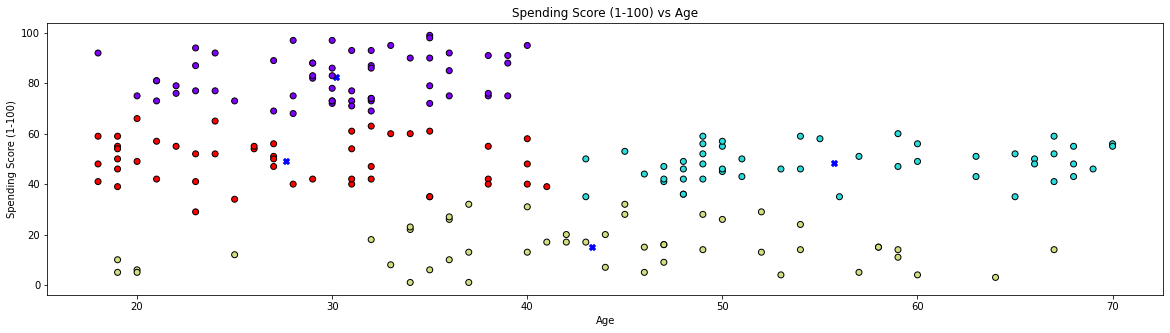

In [25]:
model = KMeans(n_clusters = 4,max_iter = 1000)#Membuat objek model K-Means dengan 4 kluster dan batasan iterasi sebanyak 1000.
model.fit(m1)
cluster = model.cluster_centers_ #Mendapatkan pusat kluster.
centroids = np.array(cluster)#Mengonversi pusat kluster menjadi array NumPy.
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show();

Hasil visualisasi ini memberikan gambaran tentang bagaimana kluster telah dibentuk berdasarkan atribut usia (Age) dan skor pengeluaran (Spending Score (1-100)) pada dataset asli. Berdasarkan pola distribusi warna, dapat dilihat bagaimana data terbagi menjadi empat kluster.Pusat kluster (ditandai sebagai "X" biru) memberikan representasi pusat dari masing-masing kluster. 

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

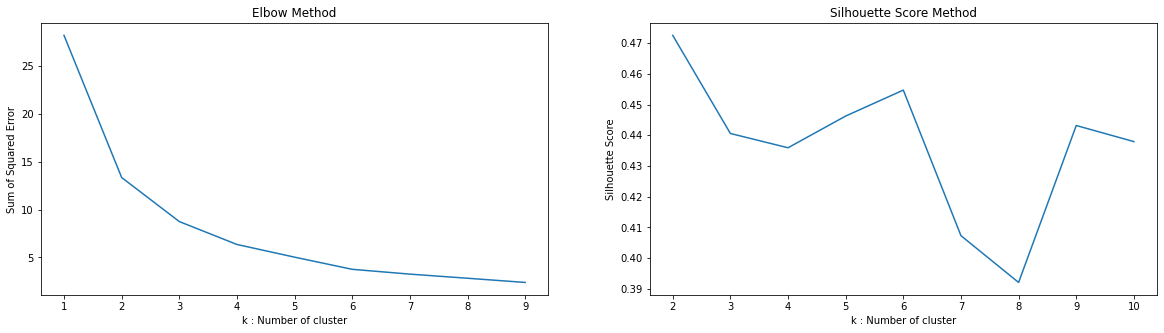

In [26]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Hasil dari kedua metode ini dapat membantu pemilihan jumlah kluster yang optimal untuk pemodelan dengan algoritma K-Means pada dataset yang telah dinormalisasi. Dari hasil ke-2 methods:
    - **k : Clusters = 6**

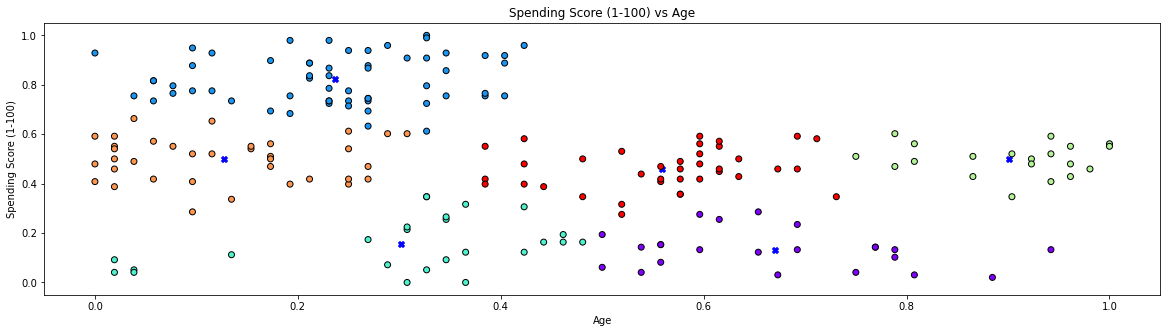

In [27]:
model = KMeans(n_clusters = 6,max_iter = 1000) # jumlah kluster (k) sebanyak 6 
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Age',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show();

Data poin yang memiliki warna yang sama menunjukkan bahwa mereka termasuk dalam kluster yang sama berdasarkan algoritma K-Means. Pemodelan ini memberikan pemisahan visual antara kelompok pelanggan yang mungkin memiliki karakteristik pengeluaran yang serupa.Kluster-kluster ini dapat digunakan untuk pemahaman lebih lanjut tentang perilaku pelanggan dan perumusan strategi pemasaran yang lebih sesuai.

### <center>Annual Income (k\$) - Spending Score (1-100)</center>

In [28]:
m1 = df1[['Annual Income (k$)', 'Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Annual Income (k$)', 'Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

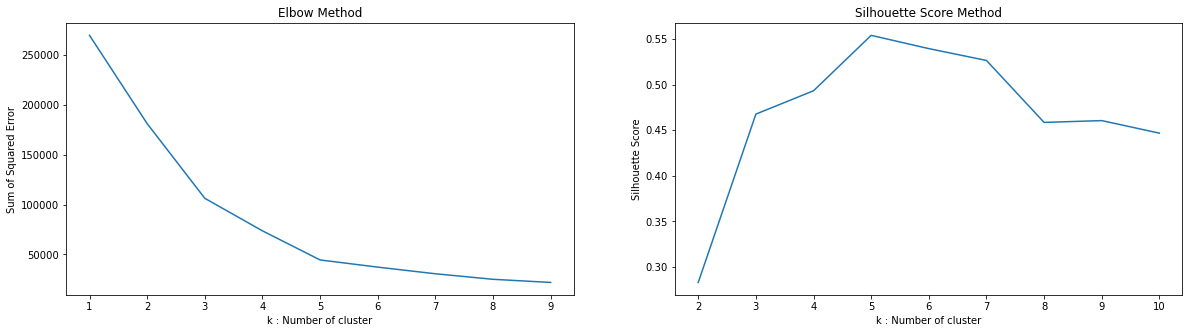

In [29]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):# dilakukan iterasi dari 1 hingga 9 untuk mencoba jumlah kluster (k) yang berbeda.
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inersia: Jumlah jarak sampel ke pusat cluster terdekat
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):#dilakukan iterasi dari 2 hingga 10 untuk mencoba nilai k yang berbeda.
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- untuk dataset m1 berdasarkan dua metode tersebut :
    - **k : Clusters = 5**

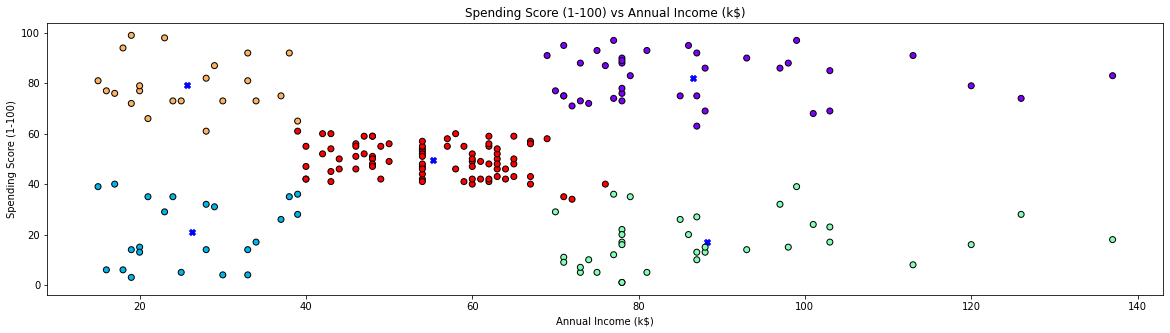

In [30]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df1,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show();

Titik biru berbentuk "X" menunjukkan lokasi pusat (centroid) dari masing-masing kluster. Visualisasi ini membantu memahami pola dan kelompok kluster yang dihasilkan oleh algoritma K-Means untuk kombinasi fitur 'Annual Income (k$)' dan 'Spending Score (1-100)' pada dataset original.

### Normalized Dataset :

#### Elbow Method & Silhouette Score Method :

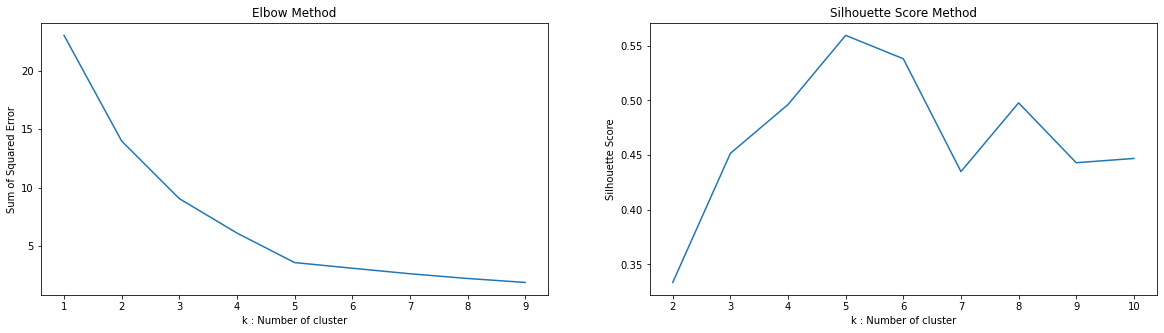

In [31]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Pada subplot pertama (sebelah kiri), memiliki metode siku yang digunakan untuk menentukan jumlah kluster yang optimal (k). Grafik menunjukkan jumlah kluster (sumbu x) versus Sum of Squared Error (SSE) atau inersia (sumbu y). Pada titik di mana penurunan inersia mulai melambat (menyerupai siku), itulah jumlah kluster optimal. 
- Pada subplot kedua (sebelah kanan), memiliki metode skor siluet yang memberikan nilai skor siluet untuk setiap jumlah kluster (k). Skor siluet mengukur seberapa baik objek tertentu cocok dengan kluster yang diidentifikasi. Nilai skor siluet berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan pemisahan kluster yang lebih baik. Dalam kasus ini, kita dapat melihat bahwa skor siluet tertinggi tercapai pada k=5.
- dari ke- 2 methods :
    - **k : Clusters = 5**

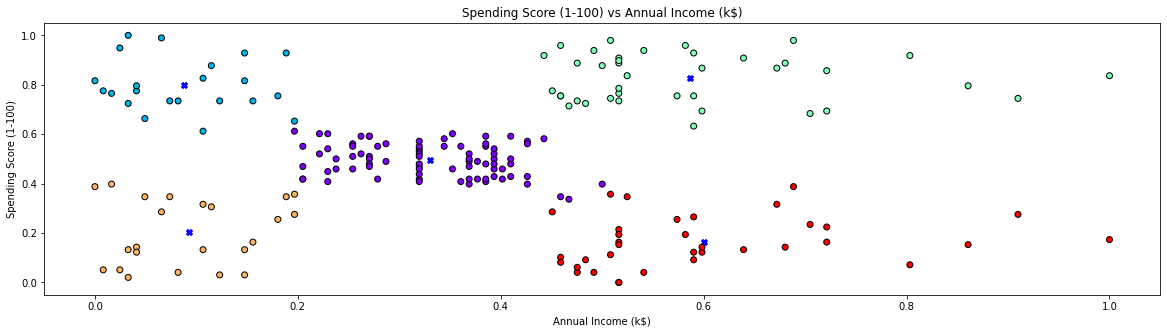

In [32]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black');
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show();

Pada sumbu X, merupakan 'Annual Income' (Pendapatan Tahunan) dan pada sumbu Y, merupakan 'Spending Score (1-100)' (Skor Pengeluaran).Dengan memvisualisasikan hubungan antara 'Annual Income (k$)' dan 'Spending Score (1-100)' berdasarkan segmentasi kluster, dapat dengan jelas melihat bagaimana algoritma K-Means membagi data menjadi kelompok-kelompok berbeda berdasarkan pola yang ada dalam data tersebut. 

### <center>Age - Annual Income (k\$) - Spending Score (1-100)</center>

In [33]:
m1 = df1[['Age','Annual Income (k$)','Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Age','Annual Income (k$)','Spending Score (1-100)']].values # Normalized Dataset

### Original Dataset :

#### Elbow Method & Silhouette Score Method :

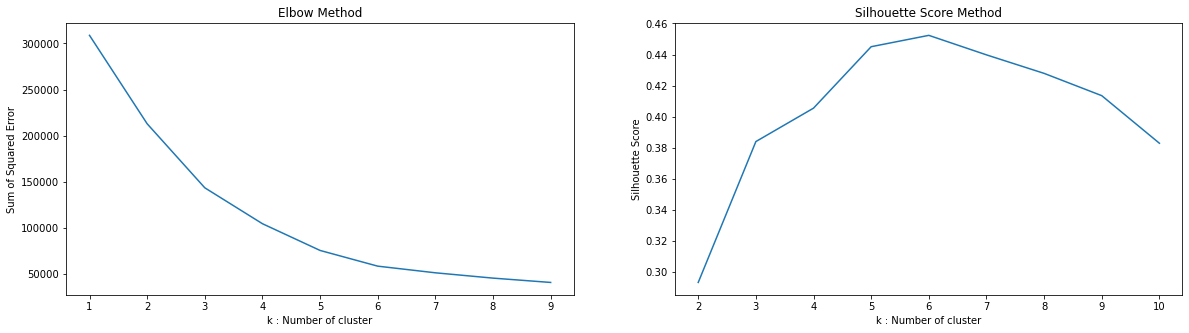

In [34]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- (Elbow Method): Grafik ini menunjukkan jumlah kluster (k) pada sumbu X dan Sum of Squared Error (SSE) pada sumbu Y. SSE mengukur sejauh mana setiap titik data dalam kluster dari pusat kluster. Pada metode elbow, kita mencari titik di mana penurunan SSE menurun secara drastis (bentuk seperti siku atau "elbow"). Dalam kasus ini, tampaknya "elbow" ada di sekitar k=6, yang menunjukkan bahwa 6 kluster mungkin merupakan pilihan yang baik.
- (Silhouette Score Method): Grafik ini menunjukkan jumlah kluster (k) pada sumbu X dan Silhouette Score pada sumbu Y. Silhouette Score mengukur seberapa baik setiap titik data ditempatkan dalam kluster mereka masing-masing. Nilai Silhouette Score berkisar dari -1 hingga 1, dan nilai yang lebih tinggi menunjukkan bahwa data point lebih baik ditempatkan dalam kluster mereka sendiri. Dalam hal ini, kita mencari nilai k di mana Silhouette Score mencapai puncaknya. Dari grafik, tampak bahwa k=5 juga memiliki nilai Silhouette Score yang tinggi.
- dari ke-2 methods:
    - **k : Clusters = 6** merupakan pilihan yang baik berdasarkan inerpretasi keedua grafik tersebut

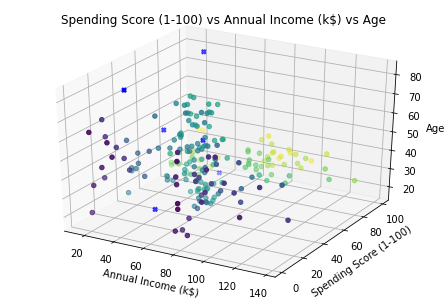

In [35]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['Annual Income (k$)'])
y = np.array(df1['Spending Score (1-100)'])
z = np.array(df1['Age'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show();

- Visualisasi ini adalah hasil dari penerapan algoritma K-Means pada dataset 'm1' (Original Dataset), yang mencakup fitur 'Annual Income', 'Spending Score (1-100)', dan 'Age' dengan jumlah kluster (k) sebanyak 6. 
- Dalam visualisasi ini, menggunakan scatter plot 3D untuk menampilkan distribusi data dalam tiga dimensi: 'Annual Income', 'Spending Score (1-100)', dan 'Age'. Beberapa elemen utama dari visualisasi ini adalah:
1. **Centroids (Tanda X Biru):** Titik-titik biru menunjukkan pusat kluster untuk setiap kluster. Pusat kluster dihitung oleh algoritma K-Means berdasarkan atribut 'Annual Income', 'Spending Score (1-100)', dan 'Age'.
2. **Titik Data (Warna Scatter):** Titik-titik tersebar menunjukkan titik data dalam dataset. Warna dari setiap titik data ditentukan oleh nilai 'Spending Score (1-100)', di mana warna ini memberikan dimensi visual tambahan.
3. **Aksis X, Y, dan Z:** Masing-masing sumbu mewakili atribut 'Annual Income', 'Spending Score (1-100)', dan 'Age'.
- Visualisasi ini membantu untuk melihat sebaran data di antara kluster dan melihat apakah kluster yang terbentuk berdasarkan ketiga atribut tersebut memberikan insight yang bermanfaat. Titik-titik yang berdekatan satu sama lain menunjukkan bahwa data dalam kluster tersebut memiliki kemiripan yang tinggi dalam ketiga atribut tersebut.

### Normalized Dataset

#### Elbow Method & Silhouette Score Method :

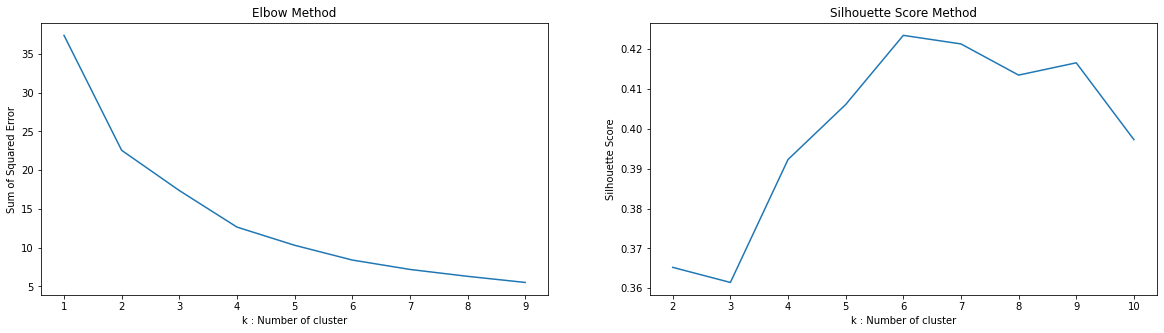

In [36]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

- Pada subplot kiri (Elbow Method), garis plot menunjukkan jumlah kluster (k) pada sumbu x dan jumlah inertia (jumlah squared error) pada sumbu y.Titik di mana elbow (siku) terlihat pada plot adalah titik di mana penurunan sum of squared error mulai melambat. Pada visualisasi ini, kita dapat melihat bahwa elbow terletak di sekitar nilai k=6.
- Pada subplot kanan (Silhouette Score Method), garis plot menunjukkan jumlah kluster (k) pada sumbu x dan skor silhouette pada sumbu y.Skor silhouette mengukur seberapa baik setiap data pada suatu kluster cocok dengan kluster sekitarnya. Nilai tertinggi menunjukkan kluster yang lebih baik.Dalam visualisasi ini, kita dapat melihat bahwa skor silhouette mencapai puncaknya pada nilai k=6.
- Dengan menggunakan kedua metode tersebut, kita dapat memilih nilai k yang optimal. Dalam hal ini, **k=6** mungkin menjadi pilihan yang baik

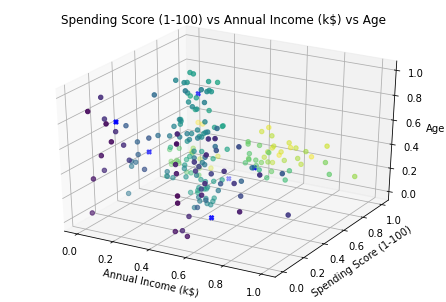

In [37]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df2['Annual Income (k$)'])
y = np.array(df2['Spending Score (1-100)'])
z = np.array(df2['Age'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker = "X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show();

- Visualisasi ini merupakan hasil dari penerapan algoritma K-Means pada dataset 'm2' (Normalized Dataset) dengan jumlah kluster (k) sebanyak 6. Pada visualisasi 3D ini, kita memanfaatkan fitur 'Annual Income', 'Spending Score (1-100)', dan 'Age' setelah proses normalisasi.

- Pada scatter plot 3D, titik-titik mewakili data dari dataset dengan sumbu x adalah 'Annual Income', sumbu y adalah 'Spending Score (1-100)', dan sumbu z adalah 'Age'.
- Pusat-pusat kluster ditandai dengan tanda "X" berwarna biru.
- Warna titik-titik pada plot menunjukkan label kluster yang diberikan oleh algoritma K-Means.
- Dari visualisasi ini,dapat diamati bagaimana data tersebar di sepanjang tiga dimensi tersebut dan bagaimana pusat-pusat kluster terletak di antara kumpulan titik.

### <center>Results Table</center>

#### Original Dataset :

|Sr. No.|Feature Combination|Number of Clusters|
|-|-|-|
|1.|Age - Annual Income (k\$)|4|
|2.|Age - Spending Score (1-100)|4|
|3.|Annual Income (k\$) - Spending Score (1-100)|5|
|4.|Age - Annual Income (k\$) - Spending Score (1-100)|6|

#### Normalized Dataset :

|Sr. No.|Feature Combination|Number of Clusters|
|-|-|-|
|1.|Age - Annual Income (k\$)|3|
|2.|Age - Spending Score (1-100)|6|
|3.|Annual Income (k\$) - Spending Score (1-100)|5|
|4.|Age - Annual Income (k\$) - Spending Score (1-100)|6|

# <center>Conclusion</center>

- Dataset ini sangat baik untuk memahami cara menangani masalah pembelajaran tanpa pengawasan (unsupervised learning). Ini memberikan peluang untuk bekerja pada masalah bisnis yang dapat digunakan untuk menciptakan berbagai strategi untuk meningkatkan penjualan.


- Untuk algoritma klastering K-Means, pemilihan hiperparameter k sangat penting dan dilakukan dengan bantuan uji statistik. Tidak banyak perbedaan dalam kinerja model ketika dilatih pada dataset asli atau dataset yang dinormalisasi dalam kasus ini.